In [3]:
import commentjson
from box import Box
from pprint import pprint
import os
from glob import glob
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import tensorflow as tf
import copy
import json

from matplotlib import pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"


In [20]:

def load_json(path):
    """The function of loading json file

    Arguments:
        path {str} -- The path of the json file

    Returns:
        list, dict -- The obj stored in the json file
    """
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def _frame_shfting(frame_infos, model_name, eval_json, qeval_json):

    infos = frame_infos[model_name]
    for i, (eval_frame, qeval_frame) in enumerate(zip(eval_json['frame_list'],
                                       qeval_json['frame_list'])):
        
        if i in should_skip:
            continue
        eval_name = eval_frame['name']
        qeval_name = qeval_frame['name']
        infos[qeval_name] = {}
        if eval_name != qeval_name:
            print('Error')
        for eval_lbs, qeval_lbs in zip(eval_frame['labels'],
                                       qeval_frame['labels']):
            keypoints = eval_lbs["keypoints"]
            qkeypoints = qeval_lbs["keypoints"]
            keys = keypoints.keys()
            tmp = []
            for key in keys:
                lnmk = np.asarray(keypoints[key])
                qlnmk = np.asarray(qkeypoints[key])
                print('-'*100)
                diff = np.sqrt(np.sum(np.square(lnmk - qlnmk)))
                print(diff)
                tmp.append(diff)
            mean_diff = np.mean(tmp)
            infos[qeval_name]["sfiting_pixels"] = mean_diff

    return frame_infos





In [21]:

eval_path = "/aidata/anders/objects/landmarks/AFLW/archive_model/seperate_head/gt.json"
qeval_path = "/aidata/anders/objects/landmarks/AFLW/archive_model/seperate_head/qeval.json"
frame_infos = {}
frame_infos["seperate_head"] = {}
frame_infos = _frame_shfting(frame_infos, "seperate_head", load_json(eval_path),
                             load_json(qeval_path))
eval_path = "/aidata/anders/objects/landmarks/AFLW/archive_model/noDIV/eval.json"
qeval_path = "/aidata/anders/objects/landmarks/AFLW/archive_model/noDIV/qeval.json"
frame_infos["noDIV"] = {}
frame_infos = _frame_shfting(frame_infos, "noDIV", load_json(eval_path),
                             load_json(qeval_path))

----------------------------------------------------------------------------------------------------
3.5054951578095452
----------------------------------------------------------------------------------------------------
183.5032562297647
----------------------------------------------------------------------------------------------------
9.64689069078737
----------------------------------------------------------------------------------------------------
193.62508661897806
----------------------------------------------------------------------------------------------------
2.029818690710934
----------------------------------------------------------------------------------------------------
5.120833569289621
----------------------------------------------------------------------------------------------------
185.70447168015278
----------------------------------------------------------------------------------------------------
4.75
-----------------------------------------------------------

3.9743071063901834
----------------------------------------------------------------------------------------------------
4.850598960215392
----------------------------------------------------------------------------------------------------
15.0
----------------------------------------------------------------------------------------------------
7.470357973253676
----------------------------------------------------------------------------------------------------
8.449251134577136
----------------------------------------------------------------------------------------------------
2.231110584020005
----------------------------------------------------------------------------------------------------
8.359745930358883
----------------------------------------------------------------------------------------------------
12.572290960680158
----------------------------------------------------------------------------------------------------
8.449928082845716
-----------------------------------------

In [14]:
def is_null(model_dict):
    if len(model_dict) == 0:
        val = 0
    elif isinstance(model_dict["sfiting_pixels"], np.float):
        val = model_dict["sfiting_pixels"]
    
    return val
keys = frame_infos["seperate_head"].keys()
range_bn_shifting  = []
noDIV_shifting  = []
for range_bn_frame, noDIV_frame in zip(frame_infos["seperate_head"], frame_infos["noDIV"]):
    val = is_null(frame_infos["seperate_head"][range_bn_frame])

    range_bn_shifting.append(val)
    val = is_null(frame_infos["noDIV"][noDIV_frame])
    noDIV_shifting.append(val)


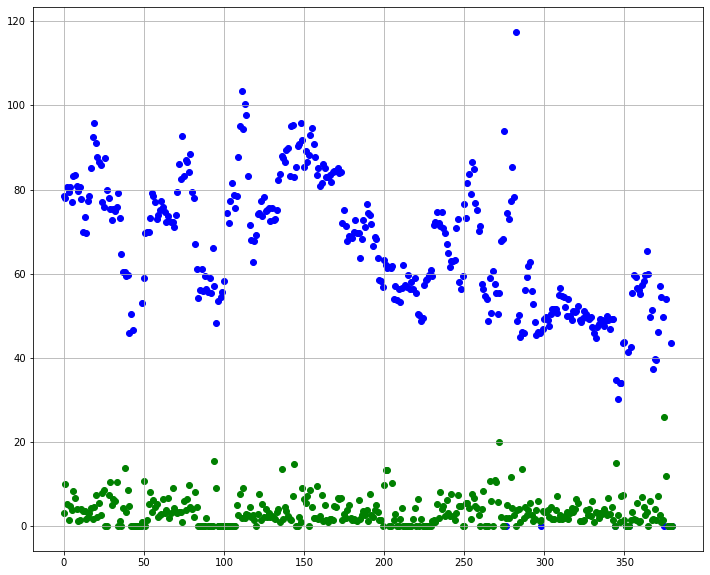

In [15]:
plt_1 = plt.figure(figsize=(12, 10))
index = np.asarray(list(range(len(keys))))
plt.scatter(index, range_bn_shifting, color='blue')
plt.scatter(index, noDIV_shifting ,color='green')
plt.grid()


In [16]:
tmp = [] 
for val in range_bn_shifting:
    if val ==0:
        continue
    tmp.append(val)
mean_values = np.mean(tmp)
print(mean_values)

66.97856604678671


In [17]:
tmp = [] 
for val in noDIV_shifting:
    if val ==0:
        continue
    tmp.append(val)
mean_values = np.mean(tmp)
print(mean_values)

4.336022455383876
